## 3.12 权重衰减 
### 3.12.2 高纬线性回归实验

In [1]:
import d2lzh as d2l
import keras
import keras.backend as K
import numpy as np

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05
features = np.random.normal(size=(n_train + n_test, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]


Using TensorFlow backend.


### 3.12.4 简洁实现

In [2]:
batch_size, num_epochs, lr = 1, 100, 0.003

def squared_loss(y_true, y_pred):
    return K.square(y_pred - y_true) / 2

class LossCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.train_ls, self.test_ls = [], []
        
    def on_epoch_end(self, batch, logs=None):
        self.train_ls.append(logs.get('loss'))
        self.test_ls.append(logs.get('val_loss'))

def fit_and_plot_gluon(wd):
    net = keras.Sequential()
    net.add(keras.layers.Dense(
        1, use_bias=True,
        kernel_regularizer=keras.regularizers.l2(wd),
        kernel_initializer=keras.initializers.normal(stddev=1), 
        bias_initializer=keras.initializers.zeros()))
    
    net.compile(optimizer=keras.optimizers.SGD(lr=lr), 
                loss=squared_loss)
    cb = LossCallback()
    net.fit(train_features, train_labels, batch_size=batch_size, epochs=num_epochs, 
              validation_data=(test_features , test_labels),
              callbacks=[cb])
    
    d2l.semilogy(range(1, num_epochs + 1), cb.train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), cb.test_ls, ['train', 'test'])
    # print('L2 norm of w:', net.get_weights()[0])
    

Train on 20 samples, validate on 100 samples
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 69.7238 - val_loss: 108.4996
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 15.2078 - val_loss: 106.2175
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 4.7996 - val_loss: 104.7072
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.6644 - val_loss: 104.1004
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6084 - val_loss: 103.6735
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2291 - val_loss: 103.4477
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0868 - val_loss: 103.3427
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0343 - val_loss: 103.2515
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 103.1975
Epoch 10/100
20/20 [========================

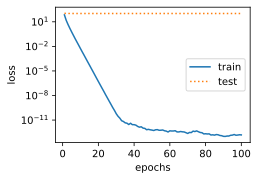

In [3]:
# 观察过拟合
fit_and_plot_gluon(0)


Train on 20 samples, validate on 100 samples
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 507.8288 - val_loss: 340.8448
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 217.2344 - val_loss: 162.9508
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 102.4008 - val_loss: 78.6077
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 49.2250 - val_loss: 38.0002
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 23.7658 - val_loss: 18.3974
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 11.4884 - val_loss: 8.9159
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 5.5563 - val_loss: 4.3273
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 2.6884 - val_loss: 2.1054
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 1.3017 - val_loss: 1.0289
Epoch 10/100
20/20 [============================

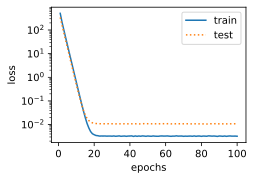

In [4]:
# 使用权重衰减
fit_and_plot_gluon(3)